# Import libraries 

In [2]:
# importing require libraries

import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
from matplotlib import pyplot as plt


In [3]:
# reading the data from file

b_df = pd.read_csv('book.csv')
b_df

# the data is in required format
# so no preprocessing required

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
b_df.isna().sum()

#no missing data

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

# Apriori Algorithm 

In [5]:
# building the association apriori algorithm

frequent_books = apriori(b_df, min_support=0.1, use_colnames=True)
frequent_books
# apriori will give peculiar combination with support of 0.1 

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [6]:
rules = association_rules(frequent_books, metric="lift", min_threshold=1)
rules
# will give all association sets and values 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [68]:
# selecting top lift items by sorting 
rule1 = rules.sort_values('lift',ascending = False)[0:30]
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [13]:
# selecting association with lift = more than one
rule2 = rules[rules.lift>1]
x= rule2.support
y= rule2.confidence
z= rule2.lift


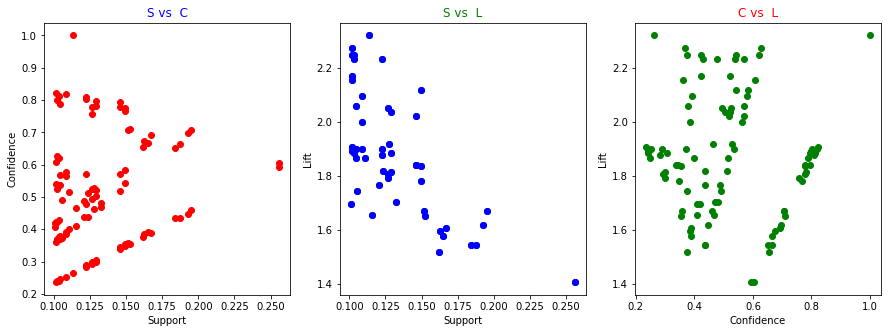

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.scatter(x,y, color= 'r')
ax1.set_xlabel('Support')
ax1.set_ylabel('Confidence')
ax1.set_title('S vs  C', color = 'blue');
ax2.scatter(x,z, color= 'b')
ax2.set_xlabel('Support')
ax2.set_ylabel('Lift')
ax2.set_title('S vs  L', color = 'green');
ax3.scatter(y,z, color= 'g')
ax3.set_xlabel('Confidence')
ax3.set_ylabel('Lift')
ax3.set_title('C vs  L', color = 'red');
plt.show()

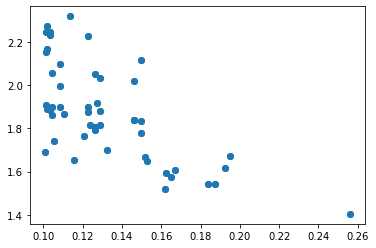

In [38]:
rule3=rules[(rules['lift']>1) & (rules['support']>.1)]
x3= rule3.support
y3= rule3.lift
fig, ax = plt.subplots()
ax.scatter(x3,y3)

Text(0.5, 1.0, 'Support Vs Lift Scatter Plot')

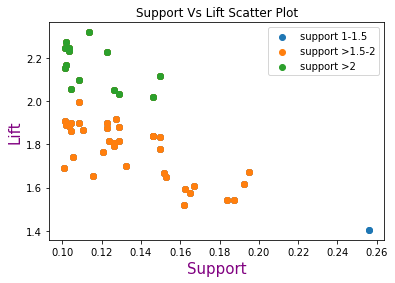

In [78]:
rule3=rules[rules['lift']>1]

fig, ax = plt.subplots()


ax.scatter((rules[rules['lift']>1]).support,(rules[rules['lift']>1]).lift, label = 'support 1-1.5')
ax.scatter((rules[rules['lift']>1.5]).support,(rules[rules['lift']>1.5]).lift, label = 'support >1.5-2')
ax.scatter((rules[rules['lift']>2]).support,(rules[rules['lift']>2]).lift, label = 'support >2')
ax.legend()
ax.set_xlabel('Support', color = 'purple', size = 15)
ax.set_ylabel('Lift' , color = 'purple', size = 15)
ax.set_title('Support Vs Lift Scatter Plot')



In [79]:
# Association mining depends on the problem at hand or the business question at hand 
# Based on rquirement we can sort, seperate rules 